# PRÉ-PROCESSAMENTO DE BASE DE INTOXICAÇÕES EXÓGENAS POR AGROTÓXICOS DE USO AGRÍCOLA
A base de dados, obtida através da Lei de Acesso à Informação do Ministério da Saúde, possui notificações de intoxicações compreendendo o período de 2010 a 2019, totalizando  124,174 registros. Cada registro é proveniente de uma ficha em papel cujos 86 campos são preenchidos manualmente, o que ocasionou diversos registros com campos nulos e uma grande falta de padronização, dificultando uma análise acurada dos dados. 

![Agencia Pública](imagens/capa.jpg)
https://reporterbrasil.org.br/2020/09/agrotoxicos-paraquate-e-glifosato-mataram-214-brasileiros-na-ultima-decada-revela-levantamento-inedito/

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

%matplotlib inline
sns.set(style="darkgrid")

In [6]:
toxi = pd.read_excel('bases/INTOXICAÇÕES_MS.xlsx')

In [12]:
version = 'v5'

In [4]:
toxi.head()

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_GEO1,ID_GEO2,CS_ZONA,ID_PAIS,DT_INVEST,ID_OCUPA_N,SIT_TRAB,LOC_EXPO,CNAE,UF_EMP,DIS_EMP,COBAIEMP,ZONA_EXP,PAIS_EXP,AGENTE_TOX,COAGTOXMA1,COAGTOXMA2,COAGTOXMA3,AGENTE_1,AGENTE_2,AGENTE_3,P_ATIVO_1,P_ATIVO_2,P_ATIVO_3,UTILIZACAO,ATIVIDA_1,ATIVIDA_2,ATIVIDA_3,VIA_1,VIA_2,VIA_3,CIRCUNSTAN,DOENCA_TRA,TPEXP,NUTEMPO,TPTEMPO,TPATENDE,HOSPITAL,DTINTERNA,UF_HOSP,MUN_HOSP,CLASSI_FIN,DIAG_CONF,CRITERIO,EVOLUCAO,DT_OBITO,CAT,DT_ENCERRA,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,IDENT_MICR,TRAB_DESC,LOC_EXP_DE,OUT_AGENTE,UTIL_DESC,LAVOURA,CIRCUN_DES,NU_LOTE_I,END_EMP
0,90,2,T659,2010-01-20,201003,2010,23,230550,1528.0,2675560.0,2010-01-20,201003,2007-07-28,4002,M,6.0,1.0,10.0,23.0,230550.0,NaN,NaN,1.0,1,2010-01-20,999991,12.0,1.0,0,23.0,NaN,NaN,1.0,1,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,2.0,1.0,1,1.0,1.0,1.0,2010-01-20,23.0,230550,1.0,T475,2.0,1.0,NaT,NaN,2010-01-21,2010-01-21,NaT,NaT,2010-01-29,NaN,NaT,NaT,0.0,NaN,NaN,ESTUDANTE,NaN,NaN,NaN,NaN,NaN,0.0,RUA04
1,25,2,T659,2010-01-10,201002,2010,23,231360,1523.0,2561328.0,2010-01-10,201002,1966-01-12,4043,F,5.0,4.0,3.0,23.0,231360.0,NaN,NaN,2.0,1,2010-01-10,999992,7.0,1.0,0,23.0,NaN,NaN,2.0,1,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,1.0,1,1.0,1.0,2.0,NaT,NaN,NaN,1.0,NaN,3.0,1.0,NaT,2.0,2010-01-10,2010-01-21,NaT,NaT,NaT,NaN,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,DIST.JABURUNA
2,704339,2,T659,2010-01-15,201002,2010,26,261160,1497.0,604.0,2010-01-14,201002,1984-04-04,4025,M,6.0,9.0,9.0,26.0,261160.0,NaN,NaN,1.0,1,2010-01-15,NaN,99.0,9.0,0,NaN,NaN,NaN,NaN,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,99.0,9.0,9.0,0,9.0,1.0,9.0,NaT,NaN,NaN,9.0,NaN,3.0,9.0,NaT,9.0,2010-01-15,2010-02-12,NaT,NaT,2010-02-26,NaN,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,782830,2,T659,2010-01-02,200952,2010,26,261160,1497.0,655.0,2010-01-02,200952,1983-10-18,4026,M,6.0,4.0,9.0,26.0,261160.0,NaN,NaN,1.0,1,2010-01-02,NaN,99.0,1.0,0,26.0,119.0,859.0,1.0,1,2,820,0,0,TEMIK 150,NaN,NaN,ALDICARB,NaN,NaN,4.0,99.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,1.0,2,1.0,1.0,2.0,NaT,NaN,NaN,1.0,T60,3.0,1.0,NaT,3.0,2010-01-03,2010-02-24,NaT,NaT,2010-02-26,NaN,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RUA RENASCENCA
4,782888,2,T659,2010-01-22,201003,2010,26,261160,1497.0,655.0,2010-01-22,201003,1964-12-25,4045,F,9.0,4.0,9.0,26.0,261160.0,NaN,NaN,1.0,1,2010-01-22,NaN,99.0,9.0,0,NaN,NaN,NaN,NaN,0,2,0,0,0,VENENO DE CUPIM,NaN,NaN,NaN,NaN,NaN,1.0,10.0,NaN,NaN,1.0,NaN,NaN,10.0,2.0,1.0,2,1.0,1.0,2.0,NaT,NaN,NaN,1.0,T60,2.0,1.0,NaT,9.0,2010-01-22,2010-02-24,NaT,NaT,2010-02-26,NaN,NaT,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [9]:
toxi.columns

Index(['NU_NOTIFIC', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       'SEM_PRI', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_GEO1', 'ID_GEO2', 'CS_ZONA',
       'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N', 'SIT_TRAB', 'LOC_EXPO', 'CNAE',
       'UF_EMP', 'DIS_EMP', 'COBAIEMP', 'ZONA_EXP', 'PAIS_EXP', 'AGENTE_TOX',
       'COAGTOXMA1', 'COAGTOXMA2', 'COAGTOXMA3', 'AGENTE_1', 'AGENTE_2',
       'AGENTE_3', 'P_ATIVO_1', 'P_ATIVO_2', 'P_ATIVO_3', 'UTILIZACAO',
       'ATIVIDA_1', 'ATIVIDA_2', 'ATIVIDA_3', 'VIA_1', 'VIA_2', 'VIA_3',
       'CIRCUNSTAN', 'DOENCA_TRA', 'TPEXP', 'NUTEMPO', 'TPTEMPO', 'TPATENDE',
       'HOSPITAL', 'DTINTERNA', 'UF_HOSP', 'MUN_HOSP', 'CLASSI_FIN',
       'DIAG_CONF', 'CRITERIO', 'EVOLUCAO', 'DT_OBITO', 'CAT', 'DT_ENCERRA',
       'DT_DIGITA', 'DT_TRANSUS', 'DT_TRANSDM', 'DT_TRANSSM', 'DT_TRANSRM',
       'DT_TRANS

In [6]:
print('Tamanho total da base: ',len(toxi))

Tamanho total da base:  124174


In [7]:
toxi['NU_ANO'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

# Problemas

Nosso objetivo é analisar as intoxicações de analisar as intoxicações de agrotóxicos de uso agrícola pelo princípio ativo da substância (ao invés de pelo nome do produto), que é dada pelos  campos P_ATIVO_1, P_ATIVO_2 e P_ATIVO_3. Além disso, o campo AGENTE_1 informa o nome comercial ou popular do produto, que pode ser utilizado para se chegar no princípio ativo. Porém, esbarramos no desafio da falta de padronização. Após uma análise exploratória inicial, os seguintes problemas de padronização foram encontrados foram encontrados:


**A**: Os campos de princípios ativos estão nulos ou preenchidos com caracteres que não trazem nenhuma informação útil. Exemplos: “XXXXXXX”, “L”, “.”, “%”, etc.


**B**: Os princípios ativos estão escritos incorretamente ou de forma não padronizada, ocasionando que o mesmo princípio aparece de formas diferentes na base, consequentemente levando a análises incorretas. Exemplos: o agrotóxico 2-4 D aparece na base como '24 D', '2,4D', '2-4 D','2-4D', '24D', '2.4.D', '2.4D', '24D', '2.4.D', '2.4D', '2 QUATRO D', '2 ,4D'.


**C**: Os campos de princípios ativos possuem a quantidade de substância ingerida, causando variabilidade nos nomes. Exemplo: “MELATIANA 500G” “LAMBDA-CYHALOTHRIN 2,5% P/V”, “MANCOZEBE 80% / PO MALHAVEL (WP)”.


**D**: Os campos que deveriam conter o princípio ativo, muitas vezes contém o nome do grupo químico da substância (ou seja, um nome mais geral) ou o nome comercial do produto (ou seja, mais específico). Exemplos: “ORGANOFOSFORADO”, “CARBAMATO”, “ROUNDUP”.


**E**: Os campos de princípios ativos possuem mais de um princípio ativo por campo, tratando-se de uma mistura de substâncias, ou um nome mais geral e um nome mais específico, como no problema D. Exemplo: “ORGANO FOSFORADO (ALDICAR B)”, ”PIRETROID; FEPRANIL”


**F**: Os campos de princípios ativos possuem valores não identificáveis. Ex: “NAO TROUXE AMBALAGEM”, “AGROTOXICO IGNORADO”, “VENENO PARA FORMIGA”


***G***: Os campos de princípios ativos possuem valores que não são de agrotóxicos. Ex: “CAFEINA”, “CLONAZEPAN 10 GTS”.

Nossa abordagem é remover os valores não identificáveis (casos A, F, G) e utilizar uma base externa com os nomes das substâncias padronizadas e tentar realizar a máxima correspondência possível dos princípios ativos não padronizados (casos B, C, D e E) para os nomes das substâncias presentes na base externa. Essa abordagem é descrita nas etapas numeradas a seguir.

In [7]:
toxi[['AGENTE_1','P_ATIVO_1','P_ATIVO_2','P_ATIVO_3']].head(100)

,AGENTE_1,P_ATIVO_1,P_ATIVO_2,P_ATIVO_3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,TEMIK 150,ALDICARB,NaN,NaN
4,VENENO DE CUPIM,NaN,NaN,NaN
5,DIVOTRIL,NaN,NaN,NaN
6,TEMIK 150,ALDICARB,NaN,NaN
7,NaN,IGNORADO,NaN,NaN
8,GLADIADOR,METAMIDOFOS,PIRACIOBINA,NaN
9,SAPOLIO CREMOSO,ALQULBENZENO SULFANATO DE SODIO,NaN,NaN


# Etapa 1: Seleção dos registros referentes a intoxicações por agrotóxicos de uso agrícola.

Essa informação é dada pelo campo AGENTE_TOX, cujo código 2 indica este tipo de intoxicação. Outros tipos de intoxicações presentes na base são “Agrotóxico doméstico”, “Raticida”, “Produto veterinário” e “Remédio”. Após essa seleção, a nova base possui 45,779. Ou seja, cerca de 37% do total da base original.

In [7]:
'''
AGENTE_TOX
2: Agrotóxico agricóla
3: Agrotóxico doméstico
4: Raticida
5: Produto veterinário
6: Remédio

ATENÇÃO: OS DADOS PODEM NÃO RESPEITAR ESSA CLASSIFICAÇÃO
'''

toxi['AGENTE_TOX'].unique()

array([5, 2, 3, 4, 6])

In [8]:
#apenas agrotóxicos de uso agrícola
agro = toxi[(toxi['AGENTE_TOX'] == 2)]
print('Registros de agrotóxicos de uso agrícola', len(agro))

Registros de agrotóxicos de uso agrícola 45779


# Etapa 2: Remoção de registros com valores nulos.
Conforme mencionado, a base possui uma grande quantidade de registros com campos nulos. Como estamos interessados nos princípios ativos, é necessário filtrar os dados que possuem os campos P_ATIVO_1, P_ATIVO_2 e P_ATIVO_3 nulos. Além de valores nulos, muitos registros estão mal preenchidos, contendo apenas caracteres que não formam nomes. Por exemplo: “XXXXXXX”, “L”, “.”, “%”, etc. Esses registros também são removidos nessa etapa. Após a remoção dos nulos, a base passa a ter 19,852 registros, cerca de 43,3% dos registros da base obtida na etapa 1. Portanto, uma perda considerável. Essa etapa soluciona os casos tipo A.

### FILTROS

In [9]:
# 1: VERIFICAR SE STRING É FORMADA POR APENAS UM TIPO DE CARACTERE (RUÍDO)
def oneChar(s):
    if s == np.nan:
        return s
    s = str(s)
    return s==len(s)*s[0]

def nullIfOneChar(s):
    if oneChar(s):
        return np.nan
    else:
        return s

def atLeastOneChar(s1,s2,s3):
    s1 = str(s1)
    s2 = str(s3)
    s3 = str(s3)    
    return ((s1==len(s1)*s1[0]) and (s2==len(s2)*s2[0]) and (s3==len(s3)*s3[0]))

#df[df.apply(lambda x: oneChar(x), axis=1)]
#df[df.apply(lambda x: atLeastOneChar(x['P_ATIVO_1'],x['P_ATIVO_2'],x['P_ATIVO_3']), axis=1)][['P_ATIVO_1','P_ATIVO_2','P_ATIVO_3']]


In [10]:
#registros com um tipo de caractere
print(len(agro[agro.apply(lambda x: oneChar(x['AGENTE_1']), axis=1)]['P_ATIVO_1'].index))
agro[agro.apply(lambda x: oneChar(x['AGENTE_1']), axis=1)][['AGENTE_1','P_ATIVO_1', 'P_ATIVO_2', 'P_ATIVO_3']].head(10)

11


,AGENTE_1,P_ATIVO_1,P_ATIVO_2,P_ATIVO_3
8010,%,NaN,NaN,NaN
19025,I,NaN,NaN,NaN
36075,ZZ,NaN,NaN,NaN
38128,~,NaN,NaN,NaN
48226,1,NaN,NaN,NaN
88244,-,NaN,NaN,NaN
88315,%,NaN,NaN,NaN
100348,[,NaN,NaN,NaN
111110,X,ENXOFRE,X,X
120226,XX,NaN,NaN,NaN


In [11]:
#tratar pa de um caractere, substituindo por vazio (nan, not an number)
df_agro = agro.copy()
df_agro['AGENTE_1'] = df_agro.apply(lambda x: nullIfOneChar(x['AGENTE_1']), axis=1)
df_agro['P_ATIVO_1'] = df_agro.apply(lambda x: nullIfOneChar(x['P_ATIVO_1']), axis=1)
df_agro['P_ATIVO_2'] = df_agro.apply(lambda x: nullIfOneChar(x['P_ATIVO_2']), axis=1)
df_agro['P_ATIVO_3'] = df_agro.apply(lambda x: nullIfOneChar(x['P_ATIVO_3']), axis=1)

#remover onde agente1, p1, p2 e p3 == nan
#df_agro = df_agro.dropna(subset=['AGENTE_1','P_ATIVO_1', 'P_ATIVO_2', 'P_ATIVO_3'], how = 'all')
df_agro = df_agro.dropna(subset=['P_ATIVO_1', 'P_ATIVO_2', 'P_ATIVO_3'], how = 'all')

print('tamanho da base completa: ', len(agro))
print('quantidade de registros nulos: ', len(agro) - len(df_agro))
print('tamanho da base após remoção dos principios ativos nulos: ', len(df_agro))
percent = (1 -len(df_agro)/len(agro))*100
print('perda: %0.2f%%' % percent)

tamanho da base completa:  45779
quantidade de registros nulos:  25927
tamanho da base após remoção dos principios ativos nulos:  19852
perda: 56.64%


* tamanho da base completa:  45779
* tamanho da base após remoção dos principios ativos nulos:  20066
* perda: 56.17%

In [12]:
df_agro[['AGENTE_1','P_ATIVO_1', 'P_ATIVO_2', 'P_ATIVO_3']].head()

,AGENTE_1,P_ATIVO_1,P_ATIVO_2,P_ATIVO_3
3,TEMIK 150,ALDICARB,NaN,NaN
6,TEMIK 150,ALDICARB,NaN,NaN
7,NaN,IGNORADO,NaN,NaN
8,GLADIADOR,METAMIDOFOS,PIRACIOBINA,NaN
11,CHUMBINHO,ORGANOFOSFORADO / CARBAMATO,NaN,NaN


In [13]:
#AGENTE_1 de um caractere
len(df_agro[df_agro.apply(lambda x: oneChar(x['P_ATIVO_3']), axis=1)])
df_agro[df_agro.apply(lambda x: oneChar(x['AGENTE_1']), axis=1)][['AGENTE_1','P_ATIVO_1', 'P_ATIVO_2', 'P_ATIVO_3']]

,AGENTE_1,P_ATIVO_1,P_ATIVO_2,P_ATIVO_3


In [14]:
#2: normalização
df_agro['AGENTE_1'] = [unidecode(str(pa)) for pa in df_agro['P_ATIVO_1']]
df_agro['P_ATIVO_1'] = [unidecode(str(pa)) for pa in df_agro['P_ATIVO_1']]
df_agro['P_ATIVO_2'] = [unidecode(str(pa)) for pa in df_agro['P_ATIVO_2']]
df_agro['P_ATIVO_3'] = [unidecode(str(pa)) for pa in df_agro['P_ATIVO_3']]

In [15]:
df_agro['P_ATIVO_1'].head(10)

3                        ALDICARB
6                        ALDICARB
7                        IGNORADO
8                     METAMIDOFOS
11    ORGANOFOSFORADO / CARBAMATO
12    ORGANOFOSFORADO / CARBAMATO
14    ORGANOFOSFORADO / CARBAMATO
16                       PARAQUAT
17                       ALDICARD
23                   OLEO VEGETAL
Name: P_ATIVO_1, dtype: object

# PRINCÍPIOS ATIVOS MAIS COMUNS
Análise antes da padronização

In [16]:
mais_comuns = df_agro.groupby(by='P_ATIVO_1').count()
mais_comuns = mais_comuns.sort_values(['NU_NOTIFIC'],ascending = False)['NU_NOTIFIC']
mais_comuns[0:10]

P_ATIVO_1
GLIFOSATO                                     2611
CHUMBINHO                                     1695
ALDICARB                                      1091
CARBAMATO                                      630
PARAQUAT                                       619
PICLORAN,SAL TRIETANOL+2,4-D,SAL TRIETANOL     529
ORGANOFOSFORADO                                522
FLUMETRALIN                                    353
CARBOFURAN                                     260
PARAQUAT+DIURON                                210
Name: NU_NOTIFIC, dtype: int64

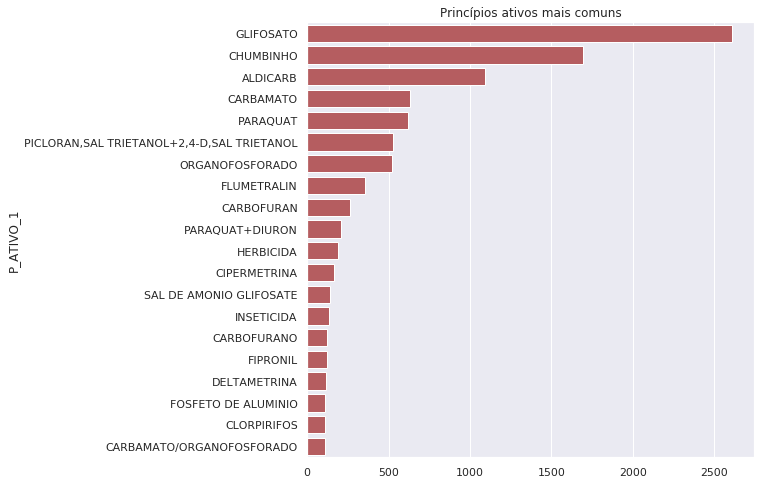

In [17]:
plt.figure(figsize=(8, 8))
plt.title('Princípios ativos mais comuns')
sns.barplot(y=mais_comuns[0:20].index, x=mais_comuns[0:20].values, color = 'C3')
plt.show()


# ETAPA 3: Mapeamento de princípios ativos por similaridade de string
Essa etapa é o cerne da nossa abordagem de padronização e iremos dividi-la em sub-tarefas. 

**a**: Utilizamos uma base externa proveniente da Anvisa, com os nomes de princípios ativos e grupos químicos padronizados, contendo tanto substâncias legalizadas quanto proibidas no Brasil.

**b**: A partir desses nomes padronizados, realizamos um mapeamento dos nomes presentes na nossa base, obtida na etapa 2, utilizando o conceito de distância de edição de strings (Robert A. Wagner and Michael J. Fischer. 1974. The String-to-String Correction Problem. J. ACM 21, 1 (Jan. 1974), 168–173). A distância de edição entre duas strings é uma métrica que indica quantas edições de caracteres (inclusão, exclusão, substituição) são necessárias para transformar uma string na outra. Por exemplo, as string “MATANIL” e “METANOL” possuem distância de edição igual a 1, pois basta trocar o “O” pelo “I”. Assim, para cada registro presente em nossa base, buscamos o princípio ativo (P_ATIVO_1, P_ATIVO_2 e P_ATIVO_3) ou nome do agente (AGENTE_1) com a menor distância de edição, buscando solucionar assim os casos tipo B.

**c**: Buscando solucionar os casos C e E, medimos também a distância de edição das substrings de cada string de nossa base e selecionamos o melhor resultado. Por exemplo, no caso da string ”PIRETROID; FEPRANIL”, primeiro procuramos o melhor match para string completa, depois para ”PIRETROID” e depois para “FEPRANIL” e selecionamos o resultado de menor distância.
Buscando solucionar os casos que apenas o grupo químico está presente, comparamos também a distância de edição dos grupos químicos na base da Anvisa e os selecionamos caso não haja uma combinação melhor de princípio ativo.

**d**: A partir dos resultados com distância de edição menor que 2, criamos um dicionário que realiza um mapeamento dos nomes presentes em nossa base para os da Anvisa. O limiar de distância 2 foi escolhido após uma extensa observação das associações, e é o valor que equilibra o máximo de associações corretas com o mínimo de erros. Com um limiar maior, o número de associações corretas aumenta, mas também aumentam o número de incorretas em proporção maior. Isso ocorre principalmente com strings curtas, que precisam de poucas edições para virar o princípio ativo de pouco tamanho. Por exemplo, o nome “LOSMA” presente na base possui como melhor match “MSMA”, com distância de edição de 2, mas está incorreto. Prezamos por realizar apenas as conversões mais seguras.

**e**: Utilizamos o dicionário para fazer a conversão de cada registro em nossa base para sua versão padronizada. Isso é feito utilizando os valores dos campos AGENTE_1, P_ATIVO_1, P_ATIVO_2 e P_ATIVO_3, nessa ordem de prioridade. Ou seja, primeiro testa-se se o valor de AGENTE_1 está presente no dicionário. Senão, testa-se o valor de P_ATIVO_1 e assim por diante. Se nenhum termo está em nosso dicionário, ou seja, se ele foi cortado por não possuir um match com distância menor que 2, atribuímos o valor “NÃO MAPEADO” a ele.

## CONJUNTOS

In [18]:
p_ativos = df_agro['P_ATIVO_1'].unique()

In [19]:
len(p_ativos)

4007

In [21]:
p_ativos2 = df_agro['P_ATIVO_2'].unique()
len(p_ativos2)

1217

In [22]:
p_ativos3 = df_agro['P_ATIVO_3'].unique()
len(p_ativos3)

560

In [23]:
agente_1 = df_agro['AGENTE_1'].unique()
print(len(agente_1))
set_agente = set(agente_1)
#set_agente.remove(np.nan)


4007


In [24]:
set_p1 = set(p_ativos)
set_p2 = set(p_ativos2)
set_p3 = set(p_ativos3)
set_p_ativos = set_p1.union(set_p2.union(set_p3))
#quantidade de princípios ativos distintos
len(set_p_ativos)

5073

In [25]:
set_p_ativos

{'LANNANTE',
 'FENITROTHION',
 'ASTYANAX SPP',
 'CLORPAN',
 'AZOXYSTROBIN + CYPROCONAZOL',
 'INIBIDOR DA ACETIL COLINESTERASE',
 'LIFOSATO',
 'DMA806',
 'NEONICOTINOIDE E PIRETRIDE',
 'IODOSULFURON - METHYL',
 'NAO INDENTIFICADO',
 '2,4-D 402 G/L',
 'ORGANO FOSFORADO/CARBAMATO',
 'ACIDO ACETIL SALICILICO',
 'RELAXANTE MUSCULAR',
 'ALFACIANO 3',
 'ORGANOFOREIDO (ALDICARB)',
 'JARDINAGEM AMADORA',
 'CLORPIRIPOS',
 'TEMIKE',
 'IMIDACLOPRIDO',
 'ANTICOLINERGICO',
 'ACETOCHLOR',
 'FURY 400ES',
 'ORNAGOFOSFODO',
 'LAMBACIA LOTRINA',
 'AMONIO',
 'GLIFOSATO - SAL DE AMONIO DE GLIFOSATO 792,5 G/KG',
 'CLORPIRITOS',
 'PIRETROIDE',
 'S-FERT BRITYTHIOMEY',
 'ALDICARBO',
 'BOVITRAZ',
 'GLIFESATO',
 'GLIFOSATO 960',
 '24 D',
 'THISACETIMIDATE',
 'MATA-MATA',
 'ANFETAMINA',
 'PICOXISTROBINA/ CIPROCONAZOL/ PROPILENOGLICOL',
 'RAYD SPRAY',
 'ACIDO DE N (FOSFONOMETIL GLICINA',
 'MONOFLUORACETATO DE SODIO',
 'AMINOPIRALIDE E FLUROXIPIR',
 'TRIETANOLAMINA',
 'MONOFLUORACETATO',
 'CLETTRODEM',
 'LT INDUTOR

In [26]:
# for pa in set_p_ativos:
#     if pa.endswith(')') and '(' in pa:
#         if '(' in pa:
#             pa_split_space = pa.split('(')[1].replace(')','').replace('(','').strip()
#             print(pa_split_space)
#         else:
#             print('**** ', pa)

In [27]:
set_p_ativos = set_p_ativos.union(set_agente)
print(len(set_p_ativos))
set_p_ativos

5073


{'LANNANTE',
 'FENITROTHION',
 'ASTYANAX SPP',
 'CLORPAN',
 'AZOXYSTROBIN + CYPROCONAZOL',
 'INIBIDOR DA ACETIL COLINESTERASE',
 'LIFOSATO',
 'DMA806',
 'NEONICOTINOIDE E PIRETRIDE',
 'IODOSULFURON - METHYL',
 'NAO INDENTIFICADO',
 '2,4-D 402 G/L',
 'ORGANO FOSFORADO/CARBAMATO',
 'ACIDO ACETIL SALICILICO',
 'RELAXANTE MUSCULAR',
 'ALFACIANO 3',
 'ORGANOFOREIDO (ALDICARB)',
 'JARDINAGEM AMADORA',
 'CLORPIRIPOS',
 'TEMIKE',
 'IMIDACLOPRIDO',
 'ANTICOLINERGICO',
 'ACETOCHLOR',
 'FURY 400ES',
 'ORNAGOFOSFODO',
 'LAMBACIA LOTRINA',
 'AMONIO',
 'GLIFOSATO - SAL DE AMONIO DE GLIFOSATO 792,5 G/KG',
 'CLORPIRITOS',
 'PIRETROIDE',
 'S-FERT BRITYTHIOMEY',
 'ALDICARBO',
 'BOVITRAZ',
 'GLIFESATO',
 'GLIFOSATO 960',
 '24 D',
 'THISACETIMIDATE',
 'MATA-MATA',
 'ANFETAMINA',
 'PICOXISTROBINA/ CIPROCONAZOL/ PROPILENOGLICOL',
 'RAYD SPRAY',
 'ACIDO DE N (FOSFONOMETIL GLICINA',
 'MONOFLUORACETATO DE SODIO',
 'AMINOPIRALIDE E FLUROXIPIR',
 'TRIETANOLAMINA',
 'MONOFLUORACETATO',
 'CLETTRODEM',
 'LT INDUTOR

# ANVISA

In [28]:
anvisa = pd.read_excel('bases/AGROTÓXICOS_ANVISA.xlsx')

In [29]:
anvisa.head(5)

,ÍNDICE MONOGRÁFICO,PRINCÍPIO ATIVO,USO AGRÍCOLA AUTORIZADO,CLASSE AGRONÔMICA,FÓRMULA BRUTA,GRUPO QUÍMICO,INGREDIENTE ATIVO (MONOGRAFIA),Nº CAS,LINK
0,A02,Acefato,AUTORIZADO CONFORME INDICADO,INSETICIDA E ACARICIDA,C4H10NO3PS,Organofosforado,ACEFATO (acephate),30560-19-1,http://portal.anvisa.gov.br/documents/111215/1...
1,A04,Ácido Giberélico,AUTORIZADO CONFORME INDICADO,REGULADOR DE CRESCIMENTO,C19H22O6,Giberelina,ÁCIDO GIBERÉLICO (gibberellic acid),Ver monografia,http://portal.anvisa.gov.br/documents/111215/1...
2,A05,Acifluorfem,AUTORIZADO CONFORME INDICADO,HERBICIDA,C14H7ClF3NO5,Éter difenílico,ACIFLUORFEM (acifluorfen),50594-66-6,http://portal.anvisa.gov.br/documents/111215/1...
3,A05.1,Acifluorfem - sódico (acifluorfen - sodium),AUTORIZADO CONFORME INDICADO,HERBICIDA,C14H6F3ClNO5Na,Éter difenílico,ACIFLUORFEM (acifluorfen),62476-59-9,http://portal.anvisa.gov.br/documents/111215/1...
4,A55,Acetato de (Z) - 5 - dodecenil,AUTORIZADO CONFORME INDICADO,FEROMÔNIO SINTÉTICO,C14H26O2,Acetato insaturado,ACETATO DE (Z)-5-DODECENILA ((Z)-5-dodecen-1-yl,16676-96-3,http://portal.anvisa.gov.br/documents/111215/1...


In [33]:
print('grupos químicos únicos: ',len(anvisa['GRUPO QUÍMICO'].unique()))
print('princípios ativos únicos: ',len(anvisa['PRINCÍPIO ATIVO'].unique()))
print('ingrediente ativo únicos: ',len(anvisa['INGREDIENTE ATIVO (MONOGRAFIA)'].unique()))

grupos químicos únicos:  172
princípios ativos únicos:  495
ingrediente ativo únicos:  442


In [35]:
#lista de principios ativos da anvisa
pa_anvisa = list(anvisa['PRINCÍPIO ATIVO'].unique())
#pa_anvisa = list(anvisa['INGREDIENTE ATIVO (MONOGRAFIA)'].unique())
gq_anvisa = list(anvisa['GRUPO QUÍMICO'].unique())

### Agrotóxicos excluídos da Anvisa

In [36]:
#adicionando os pa excluídos da anvisa
sep1 = ' – '
sep2 = ' - '
with open('bases/agrotoxicos excluidos', 'r') as f:
    lines = f.readlines()
    
pa_anvisa_excluidos = []
for l in lines:
    l1 = l.split(sep1)
    if len(l1) > 1:
        pa_anvisa_excluidos.append(l1[1].replace('\n',''))
    else:
        pa_anvisa_excluidos.append(l.split(sep2)[1].replace('\n',''))
        
pa_anvisa = pa_anvisa + pa_anvisa_excluidos
pa_anvisa   

['Acefato',
 'Ácido Giberélico',
 'Acifluorfem',
 'Acifluorfem - sódico (acifluorfen - sodium)',
 'Acetato de (Z) - 5 - dodecenil',
 'Azadiractina',
 'Aminopiralide',
 'Acetato de (E,Z) - 4,7 - tridecadienila',
 'Acetato de (E,Z,Z) - 4,7,10 - tridecatrienila',
 'Cloridrato de aviglicina (aviglycine hydrochloride)',
 'Aviglicina',
 'Acetato de (Z) - 9 - dodecenila',
 'Álcool Laurílico',
 'Acetato de (Z) - 9 - tetradecenila',
 'Acetato de (Z) - 7 - dodecenila',
 'Acetato de (Z) - 11 - hexadecenila',
 'Amicarbazona',
 'Acetato de (Z) - 8 - dodecenila',
 'Acetato de (E) - 8 - dodecenila',
 'Acibenzolar - S - Metílico',
 'Acetato de (E,Z) - 3,5 - dodecadienila',
 'Acetato de (Z) - 9 - hexadecenila',
 'Acetato de (E,Z) - 3,8 - tetradecadienila',
 'Acetato de (Z,E) - 9,12 - tetradecadienila',
 'Acetato de (E,Z,Z) - 3,8,11 - tetradecatrienila',
 'Azinsulfurom',
 'Ácido 4 - indol - 3 - ilbutírico',
 'Acetamiprido',
 'Alanicarbe',
 'Azoxistrobina',
 'Acetocloro',
 'Amitraz',
 'Acrinatrina',
 'Ab

In [37]:
len(pa_anvisa)

632

In [38]:
pa_anvisa = [pa.upper() for pa in pa_anvisa]
pa_anvisa = [unidecode(pa) for pa in pa_anvisa]

gq_anvisa = [pa.upper() for pa in gq_anvisa]
gq_anvisa = [unidecode(pa) for pa in gq_anvisa]

pa_anvisa

['ACEFATO',
 'ACIDO GIBERELICO',
 'ACIFLUORFEM',
 'ACIFLUORFEM - SODICO (ACIFLUORFEN - SODIUM)',
 'ACETATO DE (Z) - 5 - DODECENIL',
 'AZADIRACTINA',
 'AMINOPIRALIDE',
 'ACETATO DE (E,Z) - 4,7 - TRIDECADIENILA',
 'ACETATO DE (E,Z,Z) - 4,7,10 - TRIDECATRIENILA',
 'CLORIDRATO DE AVIGLICINA (AVIGLYCINE HYDROCHLORIDE)',
 'AVIGLICINA',
 'ACETATO DE (Z) - 9 - DODECENILA',
 'ALCOOL LAURILICO',
 'ACETATO DE (Z) - 9 - TETRADECENILA',
 'ACETATO DE (Z) - 7 - DODECENILA',
 'ACETATO DE (Z) - 11 - HEXADECENILA',
 'AMICARBAZONA',
 'ACETATO DE (Z) - 8 - DODECENILA',
 'ACETATO DE (E) - 8 - DODECENILA',
 'ACIBENZOLAR - S - METILICO',
 'ACETATO DE (E,Z) - 3,5 - DODECADIENILA',
 'ACETATO DE (Z) - 9 - HEXADECENILA',
 'ACETATO DE (E,Z) - 3,8 - TETRADECADIENILA',
 'ACETATO DE (Z,E) - 9,12 - TETRADECADIENILA',
 'ACETATO DE (E,Z,Z) - 3,8,11 - TETRADECATRIENILA',
 'AZINSULFUROM',
 'ACIDO 4 - INDOL - 3 - ILBUTIRICO',
 'ACETAMIPRIDO',
 'ALANICARBE',
 'AZOXISTROBINA',
 'ACETOCLORO',
 'AMITRAZ',
 'ACRINATRINA',
 'AB

In [39]:
#remove nome em parentese no final
pa_anvisa_regular = []

for pa in pa_anvisa:
    if pa.endswith(')'):
        pa_anvisa_regular.append(pa.split('(')[0].strip())
    else:
        pa_anvisa_regular.append(pa.strip())      

        
pa_anvisa_regular = [s for s in pa_anvisa_regular if len(s) > 3]
pa_anvisa_regular  


['ACEFATO',
 'ACIDO GIBERELICO',
 'ACIFLUORFEM',
 'ACIFLUORFEM - SODICO',
 'ACETATO DE (Z) - 5 - DODECENIL',
 'AZADIRACTINA',
 'AMINOPIRALIDE',
 'ACETATO DE (E,Z) - 4,7 - TRIDECADIENILA',
 'ACETATO DE (E,Z,Z) - 4,7,10 - TRIDECATRIENILA',
 'CLORIDRATO DE AVIGLICINA',
 'AVIGLICINA',
 'ACETATO DE (Z) - 9 - DODECENILA',
 'ALCOOL LAURILICO',
 'ACETATO DE (Z) - 9 - TETRADECENILA',
 'ACETATO DE (Z) - 7 - DODECENILA',
 'ACETATO DE (Z) - 11 - HEXADECENILA',
 'AMICARBAZONA',
 'ACETATO DE (Z) - 8 - DODECENILA',
 'ACETATO DE (E) - 8 - DODECENILA',
 'ACIBENZOLAR - S - METILICO',
 'ACETATO DE (E,Z) - 3,5 - DODECADIENILA',
 'ACETATO DE (Z) - 9 - HEXADECENILA',
 'ACETATO DE (E,Z) - 3,8 - TETRADECADIENILA',
 'ACETATO DE (Z,E) - 9,12 - TETRADECADIENILA',
 'ACETATO DE (E,Z,Z) - 3,8,11 - TETRADECATRIENILA',
 'AZINSULFUROM',
 'ACIDO 4 - INDOL - 3 - ILBUTIRICO',
 'ACETAMIPRIDO',
 'ALANICARBE',
 'AZOXISTROBINA',
 'ACETOCLORO',
 'AMITRAZ',
 'ACRINATRINA',
 'ABAMECTINA',
 'ATRAZINA',
 'ASULAM',
 'AMETRINA',
 '

In [40]:
#pa_anvisa_regular = [p.split('(')[0].strip() for p in pa_anvisa]
gq_anvisa_regular = []

for pa in gq_anvisa:
    if pa.endswith(')'):
        gq_anvisa_regular.append(pa.split('(')[0].strip())
    else:
        gq_anvisa_regular.append(pa.strip())      

        
gq_anvisa_regular = [s for s in gq_anvisa_regular if len(s) > 3]
#gq_anvisa_regular  


# MAPEAMENTO DOS PRINCÍPIOS ATIVOS DA BASE DO MT PARA BASE DE AGROTÓXICOS DA ANVISA

### SIMILARIDADE ENTRE STRINGS

In [41]:
#distância de edição de strings
def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    #print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [42]:
c = mais_comuns.index[0]
a = pa_anvisa[0]
print(a)
print(c)
levenshtein(c,a)

ACEFATO
GLIFOSATO


5.0

In [43]:
#quebra uma string com chave e procura a melhor combinação de cada substring em uma lista
def splitSearch(key,string,compare):
    if key not in string:
        return 100
    else:
        splits = string.split(key)
        shortest_d = 100
        
        for s in splits:            
            d = levenshtein(s.strip(),compare)
            #substrings pequenas precisam de menor mudança de edição. isso evita comparações injustas.
            if len(s) < 5 and d > 1:
                d = 100    
            if d < shortest_d:
                shortest_d = d
        return shortest_d

def getBestMatchInList(pa, pa_anvisa_regular):
    shortest_dist = 100
    best_match = ''
    
    for p_anvisa in pa_anvisa_regular:
        dist = levenshtein(pa,p_anvisa)
        if dist < shortest_dist:
            shortest_dist = dist
            best_match = p_anvisa
            
        #testa dentro dos parenteses
        if pa.endswith(')') and '(' in pa:
            #pa_split_space = pa.split('(')[1].split(')')[0]
            pa_split_space = pa.split('(')[1].replace(')','').replace('(','').strip()
            dist = levenshtein(pa_split_space,p_anvisa)
            if dist < shortest_dist:
                shortest_dist = dist
                best_match = p_anvisa
            
        #testa as substrings por diferente separadores
        dist_sep = []
        dist_sep.append(splitSearch(',', pa, p_anvisa))
        dist_sep.append(splitSearch('+', pa, p_anvisa))
        dist_sep.append(splitSearch(' E ', pa, p_anvisa))
        dist_sep.append(splitSearch('/', pa, p_anvisa))
        dist_sep.append(splitSearch('-', pa, p_anvisa))
        dist_sep.append(splitSearch(';', pa, p_anvisa))
        dist_sep.append(splitSearch(' ', pa, p_anvisa))
        dist_sep.append(splitSearch(' OU ', pa, p_anvisa))
        
        for dist in dist_sep:
            if dist < shortest_dist:
                shortest_dist = dist
                best_match = p_anvisa
            
    return shortest_dist, best_match

In [44]:

# CRIANDO CORRESPONDÊNCIAS ENTRE P_ATIVO_1 DO MS E DA ANVISA

# lev = []
# mais_similar = []
# tipo = []
# total_i = len(set_p_ativos)
# decimal = int(total_i/10)
# set_p_ativos = list(set_p_ativos)

# for i,pa in enumerate(set_p_ativos):
#     if i%decimal == 0:
#         print(str(i/decimal) + '/' + '10')   
       
#     shortest_dist, best_match = getBestMatchInList(pa, pa_anvisa_regular)
#     t = 'princípio ativo'
    
#     sd, bm = getBestMatchInList(pa, gq_anvisa_regular)
#     if sd < shortest_dist:
#         shortest_dist = sd
#         best_match = bm
#         t = 'grupo químico'                
    
#     lev.append(shortest_dist)
#     mais_similar.append(best_match)
#     tipo.append(t)
    
#dataframe_sim_ativo = pd.DataFrame({'pa_ms':list(set_p_ativos),
#                              'pa_anvisa_sim':mais_similar,
#                              'dist_lev': lev,
#                              'tipo':tipo})
#dataframe_sim_ativo.to_csv('dicionarios/dicionario_principios_ativos_agentes_'+ version +'.csv',index = False)
#dataframe_sim_ativo = dataframe_sim_ativo.sort_values(by='dist_lev',ascending=False)

dataframe_sim = pd.read_csv('dicionarios/dicionario_principios_ativos_agentes_'+version+'.csv')
len(dataframe_sim)

7720

In [45]:
dataframe_sim.tail()

,pa_ms,pa_anvisa_sim,dist_lev,tipo
7715,FLUDIOXONIL,FLUDIOXONIL,0.0,princípio ativo
7716,METAM SODICO,METAM,0.0,princípio ativo
7717,NEOCOTINOIDE PIRETROIDE,PIRETROIDE,0.0,grupo químico
7718,DIFETIALONA,DIFETIALONA,0.0,princípio ativo
7719,TRIFLOXISTROBINA + CIPROCONAZOL,CIPROCONAZOL,0.0,princípio ativo


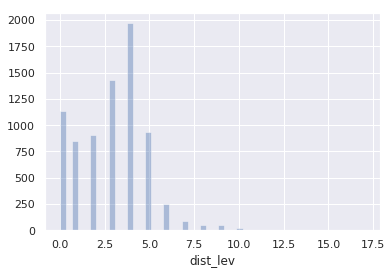

In [46]:
sns.distplot(dataframe_sim['dist_lev'],kde = False)

# ANÁLISE DO DATAFRAME DE MAPEAMENTO

In [47]:
print('total de pa: ', len(dataframe_sim))
print('total de pa iguais aos da anvisa: ', len(dataframe_sim[dataframe_sim['dist_lev'] == 0]))
print('total de pa similares aos da anvisa: ', len(dataframe_sim[dataframe_sim['dist_lev'] < 3]))
print('porcentagem de casos cobertos com segurança: ', 
      len(dataframe_sim[dataframe_sim['dist_lev'] < 3])/ len(dataframe_sim))

total de pa:  7720
total de pa iguais aos da anvisa:  1133
total de pa similares aos da anvisa:  2896
porcentagem de casos cobertos com segurança:  0.37512953367875645


In [48]:
print('princípio ativo: ',len(dataframe_sim[dataframe_sim['tipo']=='princípio ativo']))
print('grupo químico: ', len(dataframe_sim[dataframe_sim['tipo']=='grupo químico']))

princípio ativo:  6230
grupo químico:  1490


In [49]:
dataframe_sim[dataframe_sim['dist_lev'] == 2]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
4824,IMIDAGOLD,IMIDAZOL,2.0,grupo químico
4825,CUMARICO,CUMARINICO,2.0,grupo químico
4826,PARA MATAR PLANTAS,METAM,2.0,princípio ativo
4827,MESMO,MSMA,2.0,princípio ativo
4828,VENENO MATAR MATO,METAM,2.0,princípio ativo
4829,CLORPORIFON,CLORPIRIFOS,2.0,princípio ativo
4830,"HIDROXIDO DE SODIO,CLORETO DE SODIO,NITRATO DE...",FLUORETO DE SODIO,2.0,princípio ativo
4831,FURALINA,BUTRALINA,2.0,princípio ativo
4832,FOSFORO DE ALUMINIO,FOSFETO DE ALUMINIO,2.0,princípio ativo
4833,MATANIL 02,METANOL,2.0,princípio ativo


# ETAPA 4: Ajuste fino semi-manual
Buscando reduzir ao máximo a quantidade de termos não-mapeados, nessa são analisados os termos não mapeados e são criadas regras para incluir esses termos no dicionário da etapa 3.e. Essa etapa é semi-manual, pois é necessário conferir os diferentes termos não-mapeados e criar as regras de mapeamento, demandando uma grande quantidade de trabalho. Por exemplo, a substância Glifosato muitas vezes aparece com o nome comercial Roundup ou Mata-mato e suas diversas variações. Para isso foi criada uma regra de mapear todos os nomes que contenham 'MATA-MATO', 'MATAMATO', 'MATA MATO', 'RAND', 'ROUN', 'RAUND', 'HANDA', 'GLIFOSFOSATO', 'ROND UP', 'RONDA', ‘RUND',' GLIFOSAT', 'RAUDAP', 'GLICOFOSFATO', 'RAMDAP', 'RADAP', 'MATA-', 'GLICOSFATO', 'GICOSATO', 'GLICOSADO', 'GLICOFOSATO', 'GLISOFATO', ’'GLIFAZOTO', 'GLYPH', 'GLYFO', 'HANDUP', 'GLIOFOSFATO', 'GLIOF', 'GLILF', 'VANDAPI'. Ao total, 17 regras foram criadas nessa etapa, incluindo regras para substâncias não identificadas, como as descritas nos casos F. Após a criação de regras do ajuste fino, a etapa 3.f é executada novamente.

In [50]:
#busca por palavras chave
def haveWord(word,text):
    text = str(text)
    word = word.lower()
    text = text.lower()
    if word in text:
        return True
    else:
        return False

In [51]:
s = 'GLICINA'
getBestMatchInList(s,pa_anvisa_regular)    

(3.0, 'AVIGLICINA')

In [52]:
def manualMapping(search_string, original_list, map_list, dist_list, tipo_list, threshold, label, tipo):
    for i in range(len(original_list)):
        compare_string = str(original_list[i])
        if search_string in compare_string and dist_list[i] > threshold:
            tipo_list[i] = tipo
            dist_list[i] = 0
            map_list[i] = label  
            
    return map_list, dist_list, tipo_list

def listMapping(list_search,original_list, map_list, dist_list, tipo_list, threshold, label, tipo):    
    for search_string in list_search:
        map_list, dist_list, tipo_list = manualMapping(search_string, original_list, map_list, 
                                                       dist_list, tipo_list, threshold, label, tipo)
    return map_list, dist_list, tipo_list
        
        

In [53]:
original_list = list(dataframe_sim['pa_ms'])
map_list = list(dataframe_sim['pa_anvisa_sim'])
dist_list = list(dataframe_sim['dist_lev'])
tipo_list = list(dataframe_sim['tipo'])
df = dataframe_sim.copy()

### CLORPIRIFOS

In [54]:
s = ['CLOROTI', 'CLORPIRI']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = -1, label = 'CLORPIRIFOS', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s = s[-1]
#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

### MALATIONA

In [55]:
s = ['MALATI','MALATH']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = -1, label = 'MALATIONA', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s = s[0]
#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

### TIAMETOXAM

In [56]:
s = ['TIAMET','THIAMET']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'TIAMETOXAM', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s = s[-1]
#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

### METOMIL

In [57]:
s = ['LANAT','LANNAT']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = -1, label = 'METOMIL', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s = s[-1]
#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

### PARAQUATE

In [58]:
s = ['PARAGUAT', 'PARAQ', 'GRAMOX', 'GRAMAX']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'PARAQUATE', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s = s[-2]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
544,GRAMOXENE,PARAQUATE,0.0,princípio ativo
563,GRAMOXONE 200,PARAQUATE,0.0,princípio ativo
771,GRAMOXONE,PARAQUATE,0.0,princípio ativo
927,GRAMOXENE 200,PARAQUATE,0.0,princípio ativo
935,GRAMOXECONE,PARAQUATE,0.0,princípio ativo
1047,GRAMOXONE 200 G/L,PARAQUATE,0.0,princípio ativo
1233,GRAMOXONE 200,PARAQUATE,0.0,princípio ativo
1293,GRAMOXOME,PARAQUATE,0.0,princípio ativo
1299,GRAMOXONE,PARAQUATE,0.0,princípio ativo
1364,GRAMOXSONI,PARAQUATE,0.0,princípio ativo


### PARATION

In [59]:
s = ['PARAT', 'PARATH']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'PARATION', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s = s[1]
#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

### PIRIMIFOS - METILICO

In [60]:
# Flumetralina
s = ['PRIMIFOS', 'PIRIMIFOS']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'PIRIMIFOS - METILICO', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s = s[-1]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
5353,PIRIMIFOS-METILICO,PIRIMIFOS - METILICO,0.0,princípio ativo
5571,PIRIMIFOS METILICO,PIRIMIFOS - METILICO,0.0,princípio ativo


### PRIMEPLUS/ FUMETRALINA

In [61]:
# Flumetralina
s = ['PRIME PLU', 'PRIMER PLU', 'PRIMEPLU', 'PRIME-','PRIMIP', 'FUMETRALIN']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'FLUMETRALINA', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s = s[-1]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
5117,FUMETRALIN,FLUMETRALINA,0.0,princípio ativo
6160,FUMETRALINA,FLUMETRALINA,1.0,princípio ativo


### BIFENTRINA

In [62]:
# BIFENTHRIN
s = ['BIFENT', 'BIFANT']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'BIFENTRINA', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s= s[-1]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
4471,BIFANTHRIN,BIFENTRINA,0.0,princípio ativo


### METAMIDOFÓS

In [63]:
s = ['METAMIDO','METAFOS','METANIDO','METHAMIDOPHOS', 'METAMID']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'METAMIDOFOS', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s= s[-1]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
473,METAMIDOPHOS,METAMIDOFOS,0.0,princípio ativo
688,METAMIDOFOR,METAMIDOFOS,0.0,princípio ativo
951,METAMIDAFOR,METAMIDOFOS,0.0,princípio ativo
2216,METAMIDAFOS,METAMIDOFOS,0.0,princípio ativo
2232,METAMIDOFAS,METAMIDOFOS,0.0,princípio ativo
2253,METAMIDOFOS FERSOL 600,METAMIDOFOS,0.0,princípio ativo
2408,METAMIDOFOS,METAMIDOFOS,0.0,princípio ativo
2530,METAMIDOFOS,METAMIDOFOS,0.0,princípio ativo
2575,METAMIDOFOS FERSOL,METAMIDOFOS,0.0,princípio ativo
7240,METAMIDOFOS(ORGANOFOSFORADO),ORGANOFOSFORADO,0.0,grupo químico


### 2,4 D

In [64]:
# '24 D', '2,4', '2-4 D' = '2-4 D'
s = ['24 D', '2,4', '2-4 D','2-4D', '24D','2.4.D', '2.4D', '24D','2.4.D', '2.4D', '2 QUATRO', '2 ,4D']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = '2,4 - D', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s= s[-2]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
1646,2 QUATRO 0,"2,4 - D",0.0,princípio ativo


### CARBOFURANO

In [65]:
#'CARBOFURANO', 'CARBOFURAN', 'CARBAFURONA' = CARBOFURANO 
s = ['CARBOFUR', 'FURADAN', 'FURAN','FURATAN','CABORF']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'CARBOFURANO', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s= s[-1]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
769,CABORFURAM,CARBOFURANO,0.0,princípio ativo


### GLIFOSATO

In [66]:
s = ['MATA-MATO','MATAMATO', 'MATA MATO', 'RAND', 'ROUN',
    'RAUND', 'HANDA', 'GLIFOSFOSATO', 'ROND UP', 'RONDA', 
     'RUND','GLIFOSAT','RAUDAP', 'GLICOFOSFATO', 'RAMDAP', 'RADAP', 'MATA-',
    'GLICOSFATO', 'GICOSATO', 'GLICOSADO', 'GLICOFOSATO', 'GLISOFATO', 
     'GLIFAZOTO', 'GLYPH', 'GLYFO','HANDUP', 'GLIOFOSFATO', 'GLIOF', 'GLILF', 'VANDAPI']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'GLIFOSATO', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s= 'VANDAPI'
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
1757,VANDAPI,GLIFOSATO,0.0,princípio ativo


### CHUMBINHO ALDICARB

In [67]:
#s = ['CHUMBI','TEMIK', 'ALDIC', 'CHUBI', 'ALDER', 'ALDICRAB', 'ALDCARB', 
#     'ALDECARB', 'ALCICARB','ADICARB','ALBICARB', 'ALBDICARB', 'CILDICARB','CELDICARB']
s = ['CHUM', 'CHUB','ALDI','ALDER','ALDEC','ALDC','ALCIC','ADICA','ALBIC','ALBDI','DICARB', 'DCARB']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = -1, label = 'ALDICARBE', 
                                               tipo = 'princípio ativo')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s= s[-1]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
2247,ALDCARB,ALDICARBE,0.0,princípio ativo
4441,ALDCARBE,ALDICARBE,0.0,princípio ativo


In [68]:
#CARBAMATO
s = ['CARBAMAT', 'CARBAMANATO', 'CARBOMIATO']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'CARBAMATO', 
                                               tipo = 'grupo químico')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s= s[-1]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
5126,CARBOMIATO,CARBAMATO,0.0,grupo químico
5646,CARBOMIATO,CARBAMATO,0.0,grupo químico


### ORGANOFOSFORADO

In [69]:
s = ['ORGANOFOS','ORGANO FOSFORADO','ORGANOSFODFORADO','ORGANOSFOSFATO',
     'ORGANOSFOSFATADO', 'ORGOMOFOSFATO', 'ORGANO FOSFATO']
map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'ORGANOFOSFORADO', 
                                               tipo = 'grupo químico')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


s= [0]
#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

### CORREÇÃO DE ACIDO

In [70]:
#s = 'ACIDO'
#df[df.apply(lambda x: haveWord(s ,x['pa_anvisa_sim']),axis=1)]

In [71]:
s = ['LOXIA']


map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'ACIDO ARILOXIALCANOICO', 
                                               tipo = 'grupo químico')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})


#s = s[0]
#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

In [72]:
# s = ['ACIDO']


# map_list, dist_list, tipo_list = listMapping(list_search = s, 
#                                                original_list = original_list, 
#                                                map_list = map_list,
#                                                dist_list = dist_list,
#                                                tipo_list = tipo_list,
#                                                threshold = 1, label = 'NAO MAPEADO', 
#                                                tipo = '?')

# df = pd.DataFrame({'pa_ms': original_list,
#                              'pa_anvisa_sim' : map_list,
#                              'dist_lev': dist_list,
#                              'tipo': tipo_list})


# s = s[0]
#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

### NAO IDENTIFICADO

In [73]:
s = ['PARA ', 'VENEN', 'LIQUIDO', 'AGROTOX', 'FERTILIZANTE', 'BEBIDA', 
     'TONTURAS', 'NAO', 'SEM', 'MEDICAMENTO', 'MATA ', 'MATAR ', 'IGNOR', 
     'ANTI', 'DESECANTE', 'DESCON', 'CAPIM', 'NADA ',
     'REPELENTE', 'BRANCO', 'MISTURA', 'MATA-TUDO','PASTAGEM',
     'HERBICIBA','ALIMENTO', 'REMOVEDOR', 'DISECANTE', 'HERBICODA', 
     'VARIOS', 'INDETERMINA', 'ALCOOL', 'CONTROLE DE', 'OUTR']

map_list, dist_list, tipo_list = listMapping(list_search = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 1, label = 'NAO IDENTIFICADO', 
                                               tipo = '?')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})

s = s[-2]
df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
1551,CONTROLE DE PLANTAS INFESTANTES,NAO IDENTIFICADO,0.0,?
1689,CONTROLE DE PRAGAS,NAO IDENTIFICADO,0.0,?
2784,PRODUTO UTILIZADO NO CONTROLE DE PRAGAS,NAO IDENTIFICADO,0.0,?
3935,CONTROLE DE PRAGA DE ARMAZEM,NAO IDENTIFICADO,0.0,?
4589,CONTROLE DE ERVAS DANINHAS,NAO IDENTIFICADO,0.0,?


In [74]:
s = 'CIDA'

map_list, dist_list, tipo_list = manualMapping(search_string = s, 
                                               original_list = original_list, 
                                               map_list = map_list,
                                               dist_list = dist_list,
                                               tipo_list = tipo_list,
                                               threshold = 2, label = 'NAO IDENTIFICADO', tipo = '?')

df = pd.DataFrame({'pa_ms': original_list,
                             'pa_anvisa_sim' : map_list,
                             'dist_lev': dist_list,
                             'tipo': tipo_list})

#df[df.apply(lambda x: haveWord(s ,x['pa_ms']),axis=1)].tail(10)
#cida[cida['dist_lev']>1]

In [75]:
print('total de pa: ', len(df))
print('total de pa iguais aos da anvisa: ', len(df[df['dist_lev'] == 0]))
print('total de pa similares aos da anvisa: ', len(df[df['dist_lev'] < 2]))
print('porcentagem de casos cobertos com segurança: ', 
      len(df[df['dist_lev'] < 3])/ len(df))

total de pa:  7720
total de pa iguais aos da anvisa:  2562
total de pa similares aos da anvisa:  3392
porcentagem de casos cobertos com segurança:  0.525518134715026


# DADOS APÓS CORREÇÕES

In [76]:
df = df.sort_values(by='dist_lev', ascending = False)
#df

In [77]:
df[df['dist_lev']==2]

,pa_ms,pa_anvisa_sim,dist_lev,tipo
5159,CHLORFENAPYR,CLORFENAPIR,2.0,princípio ativo
5157,THIOBENCARB,TIOBENCARBE,2.0,princípio ativo
5129,ACEPHATO +SILICATO DE ALUMINIO,ACEFATO,2.0,princípio ativo
5130,LAMBDA + CHLORANTRANILIPOLE,CLORANTRANILIPROLE,2.0,princípio ativo
5148,SAL DE ISOPROPILAMINA EQUIVALENTE ACIDO DE N F...,AMIDA,2.0,grupo químico
5131,FOX,FOXIM,2.0,princípio ativo
5132,IMIDAZOLINA,IMIDAZOLINONA,2.0,grupo químico
5146,FLUORXIPIR,FLUROXIPIR,2.0,princípio ativo
5150,INTOXIFENOZIDA,METOXIFENOZIDA,2.0,princípio ativo
5145,"AMINO 3,5,6 TRICHLOROPYRIDINE 2 CARLOXYLICACID",AMIDA,2.0,grupo químico


# CONVERSÃO

In [78]:
dict_df = df[df['dist_lev'] < 2]
termos = list(dict_df['pa_ms'])
mapeamento_avisa = list(dict_df['pa_anvisa_sim'])
mapeamento_tipo = list(dict_df['tipo'])

In [79]:
tup_pa_tipo = list(zip(mapeamento_avisa,mapeamento_tipo))

In [80]:
dict_map = dict(zip(termos,tup_pa_tipo))
dict_map

{'ACEFATI E SILICATO DE ALUMINIO': ('ACEFATO', 'princípio ativo'),
 'CIPERMATRINA': ('CIPERMETRINA', 'princípio ativo'),
 'DICLORORO DE PARAQUATI': ('PARAQUATE', 'princípio ativo'),
 'ARBAMATO': ('CARBAMATO', 'grupo químico'),
 'BORAU': ('BORAX', 'princípio ativo'),
 'ORGANAFOSFORADO': ('ORGANOFOSFORADO', 'grupo químico'),
 'CIPERMETINA': ('CIPERMETRINA', 'princípio ativo'),
 'CLOROIRIFOS': ('CLORPIRIFOS', 'princípio ativo'),
 'INSETICIDA ORGANOFOSFORADOS': ('ORGANOFOSFORADO', 'grupo químico'),
 'TIAMETOXAN + LABDA-CIALOTRINA': ('TIAMETOXAM', 'princípio ativo'),
 'ACIDO ARILOXIALCONOICO': ('ACIDO ARILOXIALCANOICO', 'grupo químico'),
 'PARAGUATE': ('PARAQUATE', 'princípio ativo'),
 'GLIFOSOTO': ('GLIFOSATO', 'princípio ativo'),
 'PICLORAN,SAL TRIETANOL+2,4-D': ('PICLORAM', 'princípio ativo'),
 'DITIL-CARBOMATO': ('CARBAMATO', 'grupo químico'),
 'GLIFOSATI': ('GLIFOSATO', 'princípio ativo'),
 'GLIFOSFATO  - GLICINA': ('GLIFOSATO', 'princípio ativo'),
 'ORGANOFOSFORADA': ('ORGANOFOSFORADO

In [81]:
lista_p_ativo1 = list(df_agro['P_ATIVO_1'])
lista_p_ativo2 = list(df_agro['P_ATIVO_2'])
lista_p_ativo3 = list(df_agro['P_ATIVO_3'])
lista_agente1 = list(df_agro['AGENTE_1'])

In [82]:
#faz o mapeamento. se não estiver no dicionario, assinala 'NAO MAPEADO'
p_ativo_map = []
tipo = []
for pa,ag,pa2,pa3 in zip(lista_p_ativo1,lista_agente1,lista_p_ativo2,lista_p_ativo3):
    tup_pa = dict_map.get(pa,('NAO MAPEADO','?'))
    tup_pa2 = dict_map.get(pa2,('NAO MAPEADO','?'))
    tup_pa3 = dict_map.get(pa3,('NAO MAPEADO','?'))
    tup_ag = dict_map.get(ag,('NAO MAPEADO','?'))
    #procura em P_ATIVO_1,2,3 e em AGENTE_1 e escolhe o mais específico
    
    #agente
    if tup_ag[1] == 'princípio ativo':
        p_ativo_map.append(tup_ag[0])
        tipo.append(tup_ag[1])
    #pa1    
    elif tup_pa[1] == 'princípio ativo':
        p_ativo_map.append(tup_pa[0])
        tipo.append(tup_pa[1])
    
    #pa2
    elif tup_pa2[1] == 'princípio ativo':
        p_ativo_map.append(tup_pa2[0])
        tipo.append(tup_pa2[1])
        
    #pa3    
    elif tup_pa3[1] == 'princípio ativo':
        p_ativo_map.append(tup_pa3[0])
        tipo.append(tup_pa3[1])
        
    #grupo quimico ag
    elif tup_ag[1] == 'grupo químico':
        p_ativo_map.append(tup_ag[0])
        tipo.append(tup_ag[1])
    
    #grupo quimico pa1
    elif tup_pa[1] == 'grupo químico':
        p_ativo_map.append(tup_pa[0])
        tipo.append(tup_pa[1])
        
    #grupo quimico pa2
    elif tup_pa2[1] == 'grupo químico':
        p_ativo_map.append(tup_pa2[0])
        tipo.append(tup_pa2[1])
        
    #grupo quimico pa3
    elif tup_pa3[1] == 'grupo químico':
        p_ativo_map.append(tup_pa3[0])
        tipo.append(tup_pa3[1])
        
    elif tup_ag[0] == 'NAO IDENTIFICADO':
        p_ativo_map.append(tup_ag[0])
        tipo.append(tup_ag[1])
        
    elif tup_pa[0] == 'NAO IDENTIFICADO':
        p_ativo_map.append(tup_pa[0])
        tipo.append(tup_pa[1]) 
        
    else:
        p_ativo_map.append(tup_ag[0])
        tipo.append(tup_ag[1]) 

In [83]:
df_agro['P_ATIVO_MAP'] = p_ativo_map
df_agro['TIPO'] = tipo

In [84]:
#df_agro[['AGENTE_1','P_ATIVO_1', 'P_ATIVO_2', 'P_ATIVO_3','P_ATIVO_MAP','TIPO']]

In [85]:
df_agro.columns

Index(['NU_NOTIFIC', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       'SEM_PRI', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_GEO1', 'ID_GEO2', 'CS_ZONA',
       'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N', 'SIT_TRAB', 'LOC_EXPO', 'CNAE',
       'UF_EMP', 'DIS_EMP', 'COBAIEMP', 'ZONA_EXP', 'PAIS_EXP', 'AGENTE_TOX',
       'COAGTOXMA1', 'COAGTOXMA2', 'COAGTOXMA3', 'AGENTE_1', 'AGENTE_2',
       'AGENTE_3', 'P_ATIVO_1', 'P_ATIVO_2', 'P_ATIVO_3', 'UTILIZACAO',
       'ATIVIDA_1', 'ATIVIDA_2', 'ATIVIDA_3', 'VIA_1', 'VIA_2', 'VIA_3',
       'CIRCUNSTAN', 'DOENCA_TRA', 'TPEXP', 'NUTEMPO', 'TPTEMPO', 'TPATENDE',
       'HOSPITAL', 'DTINTERNA', 'UF_HOSP', 'MUN_HOSP', 'CLASSI_FIN',
       'DIAG_CONF', 'CRITERIO', 'EVOLUCAO', 'DT_OBITO', 'CAT', 'DT_ENCERRA',
       'DT_DIGITA', 'DT_TRANSUS', 'DT_TRANSDM', 'DT_TRANSSM', 'DT_TRANSRM',
       'DT_TRANS

In [86]:
cols = ['NU_NOTIFIC', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       'SEM_PRI', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_GEO1', 'ID_GEO2', 'CS_ZONA',
       'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N', 'SIT_TRAB', 'LOC_EXPO', 'CNAE',
       'UF_EMP', 'DIS_EMP', 'COBAIEMP', 'ZONA_EXP', 'PAIS_EXP', 'AGENTE_TOX',
       'COAGTOXMA1', 'COAGTOXMA2', 'COAGTOXMA3', 'AGENTE_1', 'AGENTE_2',
       'AGENTE_3', 'P_ATIVO_1', 'P_ATIVO_MAP', 'TIPO', 'P_ATIVO_2', 'P_ATIVO_3', 'UTILIZACAO',
       'ATIVIDA_1', 'ATIVIDA_2', 'ATIVIDA_3', 'VIA_1', 'VIA_2', 'VIA_3',
       'CIRCUNSTAN', 'DOENCA_TRA', 'TPEXP', 'NUTEMPO', 'TPTEMPO', 'TPATENDE',
       'HOSPITAL', 'DTINTERNA', 'UF_HOSP', 'MUN_HOSP', 'CLASSI_FIN',
       'DIAG_CONF', 'CRITERIO', 'EVOLUCAO', 'DT_OBITO', 'CAT', 'DT_ENCERRA',
       'DT_DIGITA', 'DT_TRANSUS', 'DT_TRANSDM', 'DT_TRANSSM', 'DT_TRANSRM',
       'DT_TRANSRS', 'DT_TRANSSE', 'NU_LOTE_V', 'NU_LOTE_H', 'IDENT_MICR',
       'TRAB_DESC', 'LOC_EXP_DE', 'OUT_AGENTE', 'UTIL_DESC', 'LAVOURA',
       'CIRCUN_DES', 'NU_LOTE_I', 'END_EMP']
df_agro = df_agro[cols]

# DICIONÁRIO DE NOMES DE PRODUTOS

In [87]:
file_prod = 'bases/registrosconcedidos20052019site03.10.2019.xlsx'
df_prod = pd.read_excel(file_prod ,sheet_name = 'Dicionario_produto_ingrediente')
df_prod.head()

,Marca comercial,Ingrediente Ativo
0,Delta Técnico,Deltametrina
1,Difenoconazole Js Técnico Helm,Difenoconazol
2,Difenoconazole Técnico SNB,Difenoconazol
3,Sulfentrazona Técnico IS,Sulfentrazona
4,Olasul Técnico,Sulfentrazona


In [88]:
len(df_prod)

3061

In [89]:
prod = [unidecode(str(pa).upper()) for pa in df_prod['Marca comercial']]
ingrediente = [unidecode(str(pa).upper()).replace('2,4-D','2,4 - D') for pa in df_prod['Ingrediente Ativo']]
ingredientes_normalizados = []
#ajuste quando há mais de um ingrediente ativo: usa somente o primeiro
for ing in ingrediente:
    sep = [' + ','; ',', ']
    for s in sep:        
        if s in ing:
            ing = ing.split(s)[0]
            break
    ingredientes_normalizados.append(ing.strip())  
      
dict_prod = dict(zip(prod,ingredientes_normalizados))
dict_prod

{'DELTA TECNICO': 'DELTAMETRINA',
 'DIFENOCONAZOLE JS TECNICO HELM': 'DIFENOCONAZOL',
 'DIFENOCONAZOLE TECNICO SNB': 'DIFENOCONAZOL',
 'SULFENTRAZONA TECNICO IS': 'SULFENTRAZONA',
 'OLASUL TECNICO': 'SULFENTRAZONA',
 'SULFENTRAZONE OL TECNICO HELM': 'SULFENTRAZONA',
 'INSSIMO': 'ACIBENZOLAR-S-METILICO',
 'AZOXYSTROBIN TECNICO YNG': 'AZOXISTROBINA',
 'DIQUAT ZF TECNICO HELM': 'DIQUATE',
 'METRIBUZIM TECNICO NORTOX': 'METRIBUZIM',
 'ROUNDUP ORIGINAL MAIS': 'GLIFOSATO',
 'DECISIVE': 'GLIFOSATO',
 'KASAN MAX 750 WG': 'MANCOZEBE',
 'TAURA 200 EC': 'PIRIPROXIFEM',
 'ELATUS TRIO': 'AZOXISTROBINA',
 'TIGER 100 EW': 'PIRIPROXIFEM',
 'TOPATUDO': 'GLIFOSATO',
 'ZARDO': '2,4 - D',
 'TAMIZ': 'AZOXISTROBINA',
 'AGILE': 'CLETODIM',
 'VORAZ EC': 'METOMIL',
 'AVICTA 500 FS PRO': 'ABAMECTINA',
 'SOYAGUARD XTRA': 'IMAZETAPIR',
 'ABAMECTIN TECNICO RDB': 'ABAMECTINA',
 'HEXAZINONA TECNICO ADAMA BR': 'HEXAZINONA',
 'TIOFANATO-METILICO TECNICO SUP': 'TIOFANATO-METILICO',
 'TIOFANATO-METILICO TECNICO TIDE': '

In [90]:
s = '2,4 - D'
getBestMatchInList(s,pa_anvisa_regular)  

(0.0, '2,4 - D')

In [91]:
#conjunto dos nomes não mapeados
agentes_nao_mapeados = set(list(df_agro[(df_agro['P_ATIVO_MAP']=='NAO MAPEADO')]['AGENTE_1']))
pa_nao_mapeados = set(list(df_agro[(df_agro['P_ATIVO_MAP']=='NAO MAPEADO')]['P_ATIVO_1']))
nomes_nao_mapeados = agentes_nao_mapeados.union(pa_nao_mapeados)
print(len(nomes_nao_mapeados))
nomes_nao_mapeados

1653


{'LANNANTE',
 'FENITROTHION',
 'S-METOLACLORO',
 'CLORPAN',
 'SLIFOMATO',
 'INIBIDOR DA ACETIL COLINESTERASE',
 'DMA806',
 "-DIMETHYL-4,4'-BIPYRIDINIUM DICHLORIDE",
 'SAL DIMETILAMINA',
 'IODOSULFURON - METHYL',
 'TUJONA',
 'ALFACIANO 3',
 'JARDINAGEM AMADORA',
 'CLORETO DE BELZALCONIO 6%',
 'TEMIKE',
 'FURY 400ES',
 'DIMETHYE,BIPURIDIUM DICHORIDO',
 'ORNAGOFOSFODO',
 'AMONIO',
 'TROCETIMIDATO',
 'HEXACLOROBENZENO',
 'RAYD SPRAY',
 'ACIDO DE N (FOSFONOMETIL GLICINA',
 'CONTAP',
 'MONOFLUORACETATO DE SODIO',
 'TRIETANOLAMINA',
 'MONOFLUORACETATO',
 '100 G/L OU 9,5% (P/P)LAMBDA-CIALOTRINA',
 'BUTILGLICOL',
 'DIMETHYL 4.4',
 'QUETIAPINA',
 'FLIFOSFATO',
 'CARBONATO,',
 'GLICOFATO',
 'NITROSIN',
 'DIETHYL 0-3,5,6 TRICHOLORO 2',
 'TARDO',
 'COLOSSO POUR ON',
 'DICLOROVINIL DIMETILFOSFATO',
 'CARBONATO',
 'FLOXETINA 20MG',
 'RINEQUICAPIR',
 'ACEPHATE',
 'METILPAROTION',
 'AGROLEO',
 'MATCH EC',
 'SODA CAUSTICA',
 'DELMETRINA',
 'CIALOFOPE ACIDO',
 'NICOTIANA TABACUM',
 'DIANIZON',
 'METHOXYF

In [92]:
#'GLIOFOSFATO', 'GLILFOSFATO', 'VANDAPI'
#'GRAMAXONE'

In [93]:
#for p in nomes_nao_mapeados:
#    print(type(p))

In [94]:
### MAPEAMENTO DOS NOMES PARA PRODUTOS E PARA PRINCIPIOS ATIVOS
# lev = []
# mais_similar = []
# pa_predito = []
# tipo = []
# total_i = len(nomes_nao_mapeados)
# decimal = int(total_i/10)
# set_p_ativos = list(nomes_nao_mapeados)

# for i,pa in enumerate(nomes_nao_mapeados):
#     if i%decimal == 0:
#         print(str(i/decimal) + '/' + '10')   
       
#     pa = str(pa)
#     shortest_dist, best_match = getBestMatchInList(pa,prod)
#     t = 'princípio ativo'              
    
#     lev.append(shortest_dist)
#     mais_similar.append(best_match)
#     pa_predito.append(dict_prod[best_match])
#     tipo.append(t)

# dataframe_sim_prod = pd.DataFrame({'nome_ms':list(nomes_nao_mapeados),
#                              'prod_mais_similar':mais_similar,
#                              'dist_lev': lev,
#                              'ingrediente':pa_predito,
#                              'tipo':tipo})
# dataframe_sim_prod.to_csv('dicionarios/produto_ingrediente.csv',index=False)
dataframe_sim_prod = pd.read_csv('dicionarios/produto_ingrediente.csv')

In [95]:
dataframe_sim_prod = dataframe_sim_prod.sort_values(by='dist_lev',ascending=False)
dataframe_sim_prod.head(5)

,nome_ms,prod_mais_similar,dist_lev,ingrediente,tipo
1818,DIETILNITROFENILTHIOFOSFATO,DIURON TECNICO NUFARM,18.0,DIURON,princípio ativo
1204,HEXA CLOROFADOROEXANODIELINOGLICOL,CLOROTALONIL 500 SC OF,18.0,CLOROTALONIL,princípio ativo
5141,ACETYLPHOSPHDRAMIDOTHIOATE,ACETAMIPRID NORTOX,17.0,ACETAMIPRIDO,princípio ativo
4844,N-(PHOSPHONOMITHYL)GLYCINE,MESOSULFURON METHYL TEC,17.0,MESOSULFURON METHYL,princípio ativo
4112,TETRACHLOROISOPHTHALONITRILE,CHLOROTHALONIL TECNICO,17.0,CHLOROTHALONIL,princípio ativo


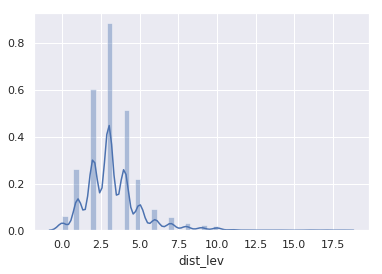

In [96]:
sns.distplot(dataframe_sim_prod['dist_lev'])

In [97]:
print(len((dataframe_sim_prod[dataframe_sim_prod['dist_lev']==0])))
(dataframe_sim_prod[dataframe_sim_prod['dist_lev']==0])

119


,nome_ms,prod_mais_similar,dist_lev,ingrediente,tipo
4578,CRUCIAL,CRUCIAL,0.0,GLIFOSATO,princípio ativo
2713,PREMIO DUPONT,PREMIO,0.0,FLUTRIAFOL,princípio ativo
796,RIVAX,RIVAX,0.0,CARBENDAZIM,princípio ativo
2671,CERCONIL,CERCONIL,0.0,TIOFANATO METILICO,princípio ativo
746,GAUCH STANDAK,STANDAK,0.0,PIRACLOSTROBINA+TIOFANATO METILICO+FIPRONIL,princípio ativo
886,PRECISO,PRECISO,0.0,GLIFOSATO,princípio ativo
2646,ROCKS,ROCKS,0.0,BIFENTRINA,princípio ativo
1689,HERO DAMEC,HERO,0.0,ZETA-CIPERMETRINA,princípio ativo
4580,"ELLECT,KREFO,INSPERADOR",ELLECT,0.0,HIDROXI DE COBRE,princípio ativo
4566,"TENAZ,GRANARY",GRANARY,0.0,IMIDACLOPRID,princípio ativo


# CONVERSÃO

In [98]:
dict_df = dataframe_sim_prod[dataframe_sim_prod['dist_lev']==0]
termos = list(dict_df['nome_ms'])
mapeamento_avisa = list(dict_df['ingrediente'])
mapeamento_tipo = list(dict_df['tipo'])
tup_pa_tipo = list(zip(mapeamento_avisa,mapeamento_tipo))
dict_map = dict(zip(termos,tup_pa_tipo))
dict_map

{'CRUCIAL': ('GLIFOSATO', 'princípio ativo'),
 'PREMIO DUPONT': ('FLUTRIAFOL', 'princípio ativo'),
 'RIVAX': ('CARBENDAZIM', 'princípio ativo'),
 'CERCONIL': ('TIOFANATO METILICO', 'princípio ativo'),
 'GAUCH STANDAK': ('PIRACLOSTROBINA+TIOFANATO METILICO+FIPRONIL',
  'princípio ativo'),
 'PRECISO': ('GLIFOSATO', 'princípio ativo'),
 'ROCKS': ('BIFENTRINA', 'princípio ativo'),
 'HERO DAMEC': ('ZETA-CIPERMETRINA', 'princípio ativo'),
 'ELLECT,KREFO,INSPERADOR': ('HIDROXI DE COBRE', 'princípio ativo'),
 'TENAZ,GRANARY': ('IMIDACLOPRID', 'princípio ativo'),
 'TARGA MAX': ('QUIZALOFOPE-P-ETILICO', 'princípio ativo'),
 'FUSAO': ('METOMINOSTROBINA', 'princípio ativo'),
 'DIMAX 480 SC': ('DIFLUBENZUROM', 'princípio ativo'),
 'DEZ': ('2,4 - D', 'princípio ativo'),
 'EXITOPOS/ NORTON': ('SAL TRIETANOLAMINADE 2,4 - D+SAL DE TRIETANOLAMINA DE PICLORAM',
  'princípio ativo'),
 'PLANADOR+DISPARO+ALLY': ('FLUROXIPIR-METILICO', 'princípio ativo'),
 'MAJESTY': ('METOMIL', 'princípio ativo'),
 'OBNY': 

In [99]:
lista_p_ativo1 = list(df_agro['P_ATIVO_1'])
lista_agente1 = list(df_agro['AGENTE_1'])
lista_tipo = list(df_agro['TIPO'])
lista_p_map = list(df_agro['P_ATIVO_MAP'])

In [100]:
#faz o mapeamento. se não estiver no dicionario, assinala 'NAO MAPEADO'
p_ativo_map = []
tipo = []
novos_mapeados = []
counter = 0
for pa,ag,tip,pmap in zip(lista_p_ativo1,lista_agente1,lista_tipo,lista_p_map):
    if pmap != 'NAO MAPEADO':
        p_ativo_map.append(pmap)
        tipo.append(tip)
    
    else:
        #counter += 1
        #novos_mapeados.append((ag,pa,tup_pa,tup_ag))
        tup_pa = dict_map.get(pa,('NAO MAPEADO','?'))
        tup_ag = dict_map.get(ag,('NAO MAPEADO','?'))
        
        if tup_ag[1] != '?' or tup_pa[1] != '?':
            counter += 1
            novos_mapeados.append((ag,pa,tup_pa,tup_ag))
            
        
        #procura em P_ATIVO_1 e em AGENTE_1 e escolhe o mais específico
        if tup_ag[1] == 'princípio ativo':
            p_ativo_map.append(tup_ag[0])
            tipo.append(tup_ag[1])

        elif tup_pa[1] == 'princípio ativo':
            p_ativo_map.append(tup_pa[0])
            tipo.append(tup_pa[1])

        elif tup_ag[1] == 'grupo químico':
            p_ativo_map.append(tup_ag[0])
            tipo.append(tup_ag[1])

        elif tup_pa[1] == 'grupo químico':
            p_ativo_map.append(tup_pa[0])
            tipo.append(tup_pa[1])

        elif tup_ag[0] == 'NAO IDENTIFICADO':
            p_ativo_map.append(tup_ag[0])
            tipo.append(tup_ag[1])

        elif tup_pa[0] == 'NAO IDENTIFICADO':
            p_ativo_map.append(tup_pa[0])
            tipo.append(tup_pa[1]) 

        else:
            #counter -= 1
            #novos_mapeados.pop()
            p_ativo_map.append(tup_ag[0])
            tipo.append(tup_ag[1]) 
print(counter)

16


In [101]:
# for pa,ag,tip,pmap in zip(lista_p_ativo1,lista_agente1,lista_tipo,lista_p_map):
#     if(pmap == 'NAO MAPEADO'):
#         tup_pa = dict_map.get(pa,('NAO MAPEADO','?'))
#         tup_ag = dict_map.get(ag,('NAO MAPEADO','?'))
#         print(ag,pa,tup_pa,tup_ag)

In [102]:
novos_mapeados

[('TOCHA',
  'TOCHA',
  ('DICLORETO DE PARAQUATE', 'princípio ativo'),
  ('DICLORETO DE PARAQUATE', 'princípio ativo')),
 ('FOX',
  'FOX',
  ('TRIFLOXYSTROBINA', 'princípio ativo'),
  ('TRIFLOXYSTROBINA', 'princípio ativo')),
 ('ENGEO PLENO',
  'ENGEO PLENO',
  ('TIAMETOXAM', 'princípio ativo'),
  ('TIAMETOXAM', 'princípio ativo')),
 ('RIVAX',
  'RIVAX',
  ('CARBENDAZIM', 'princípio ativo'),
  ('CARBENDAZIM', 'princípio ativo')),
 ('HELMOXONE',
  'HELMOXONE',
  ('PARAQUATE', 'princípio ativo'),
  ('PARAQUATE', 'princípio ativo')),
 ('HELMOXONE',
  'HELMOXONE',
  ('PARAQUATE', 'princípio ativo'),
  ('PARAQUATE', 'princípio ativo')),
 ('PLANADOR',
  'PLANADOR',
  ('FLUROXIPIR-METILICO', 'princípio ativo'),
  ('FLUROXIPIR-METILICO', 'princípio ativo')),
 ('FOX',
  'FOX',
  ('TRIFLOXYSTROBINA', 'princípio ativo'),
  ('TRIFLOXYSTROBINA', 'princípio ativo')),
 ('HELMOXONE',
  'HELMOXONE',
  ('PARAQUATE', 'princípio ativo'),
  ('PARAQUATE', 'princípio ativo')),
 ('HERO',
  'HERO',
  ('ZETA-CI

In [103]:
df_agro['P_ATIVO_MAP'] = p_ativo_map
df_agro['TIPO'] = tipo

In [104]:
df_agro.to_csv('bases_mapeadas/agrotoxicos_mapeados_'+version+'.csv',index = False)

# ANÁLISE DOS NOVOS DADOS MAPEADOS

Ao final deste processo, 15,790 registros (79.6%) da base foram padronizada para um princípio ativo da base da anvisa, 1231 registros (6.2%) foram mapeados como não identificados (casos tipo F) e 2831 (14.2%) não foram mapeados. Os casos mapeados são casos que não foram contemplados no ajuste fino, nomes de produto, nomes escritos de formatos diferentes e nomes que não são de agrotóxicos (casos G) ou que não estão na base da Anvisa. Uma possível melhoria seria utilizar uma base externa mais completa para realizar a padronização.

In [13]:
df_agro = pd.read_csv('bases_mapeadas/agrotoxicos_mapeados_'+version+'.csv')

/home/cabral/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (25,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
len(df_agro)

19852

In [107]:
print('tamanho da base completa: ', len(agro))
print('tamanho da base após remoção dos principios ativos nulos: ', len(df_agro))
percent = (1 -len(df_agro)/len(agro))*100
print('perda: %0.2f%%' % percent)

tamanho da base completa:  45779
tamanho da base após remoção dos principios ativos nulos:  19852
perda: 56.64%


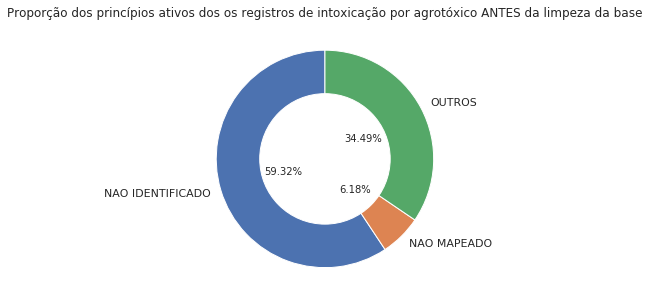

In [108]:
#CONSIDERANDO A BASE ANTES DE REMOVER OS NULOS (QUE SÃO NÃO IDENTIFICADOS)
plt.figure(figsize=(5, 5))
#plt.title('Proporção entre mensagens de mídia e de texto')
nulos = len(agro) - len(df_agro)
n_id = len(df_agro[df_agro['P_ATIVO_MAP']=='NAO IDENTIFICADO']) + nulos 
n_map = len(df_agro[df_agro['P_ATIVO_MAP']=='NAO MAPEADO'])
n_outros = len(df_agro[df_agro['TIPO']!='?'])
x = [n_id, n_map, n_outros]
names = ['NAO IDENTIFICADO','NAO MAPEADO','OUTROS']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4)
plt.title('Proporção dos princípios ativos dos os registros de intoxicação por agrotóxico ANTES da limpeza da base')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

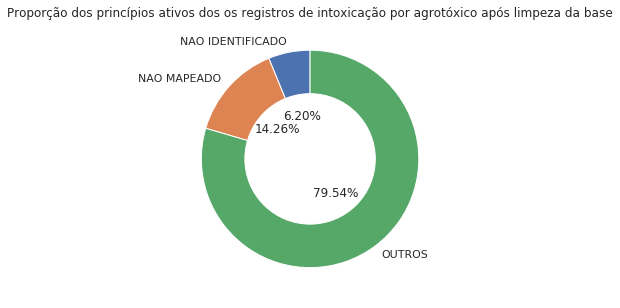

In [15]:
plt.figure(figsize=(5, 5))
#plt.title('Proporção entre mensagens de mídia e de texto')
n_id = len(df_agro[df_agro['P_ATIVO_MAP']=='NAO IDENTIFICADO'])
n_map = len(df_agro[df_agro['P_ATIVO_MAP']=='NAO MAPEADO'])
n_outros = len(df_agro) - (n_id + n_map)
x = [n_id, n_map, n_outros]
names = ['NAO IDENTIFICADO','NAO MAPEADO','OUTROS']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4)
plt.title('Proporção dos princípios ativos dos os registros de intoxicação por agrotóxico após limpeza da base')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
x

[1231, 2831, 15790]

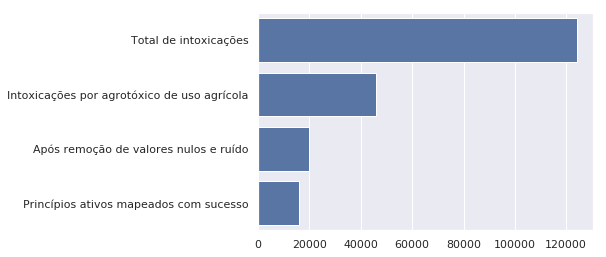

In [110]:
t_original = len(toxi)
t_base_agro = len(agro)
t_base_dropna = len(df_agro)
values = [t_original,t_base_agro,t_base_dropna, n_outros]
labels = ['Total de intoxicações', 'Intoxicações por agrotóxico de uso agrícola', 
          'Após remoção de valores nulos e ruído', 'Princípios ativos mapeados com sucesso']
sns.barplot(x=values,y=labels,color ='b')


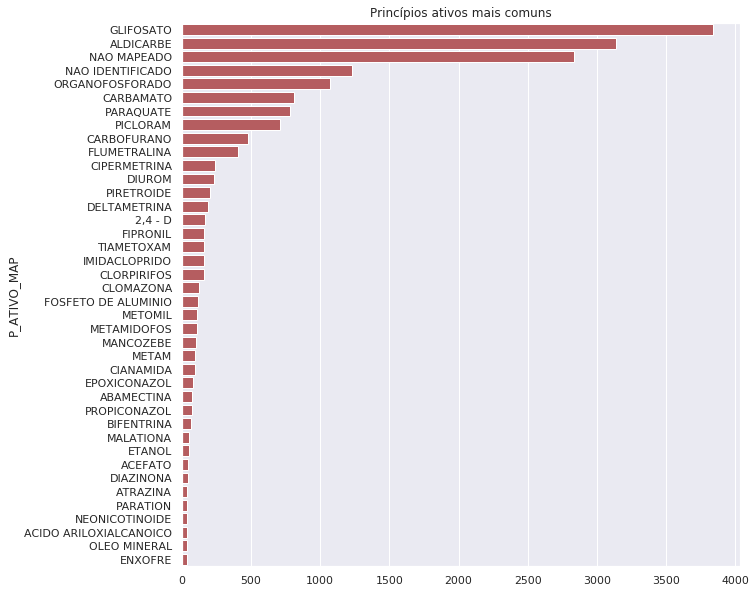

In [111]:
mais_comuns = df_agro.groupby(by='P_ATIVO_MAP').count()
mais_comuns = mais_comuns.sort_values(['NU_NOTIFIC'],ascending = False)['NU_NOTIFIC']
plt.figure(figsize=(10,10))
plt.title('Princípios ativos mais comuns')
labels = mais_comuns[0:40].index
values = mais_comuns[0:40].values
#plt.xticks(values, labels, rotation='vertical')
sns.barplot(y=labels, x=values, color = 'C3')
plt.show()


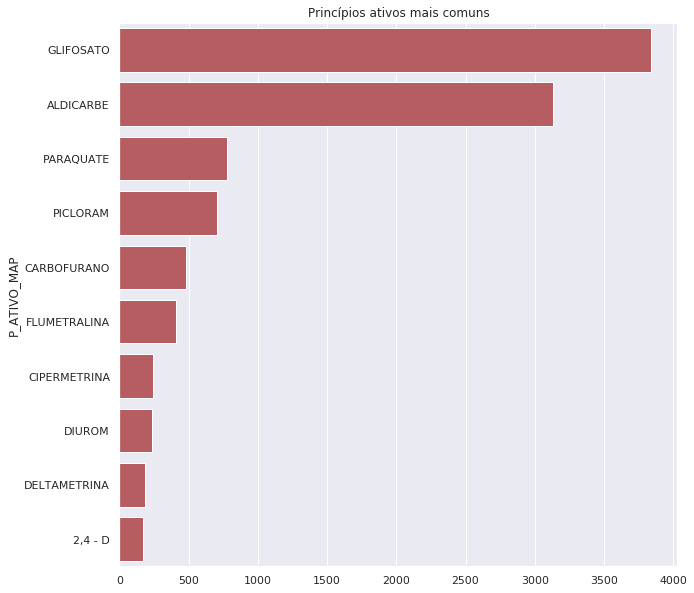

In [112]:
#mais comuns excluindo os desconhecidos e não mapeados
mais_comuns = df_agro[df_agro['TIPO'] == 'princípio ativo'].groupby(by='P_ATIVO_MAP').count()
mais_comuns = mais_comuns.sort_values(['NU_NOTIFIC'],ascending = False)['NU_NOTIFIC']
plt.figure(figsize=(10,10))
plt.title('Princípios ativos mais comuns')
labels = mais_comuns[0:10].index
values = mais_comuns[0:10].values
#plt.xticks(values, labels, rotation='vertical')
sns.barplot(y=labels, x=values, color = 'C3')
plt.show()


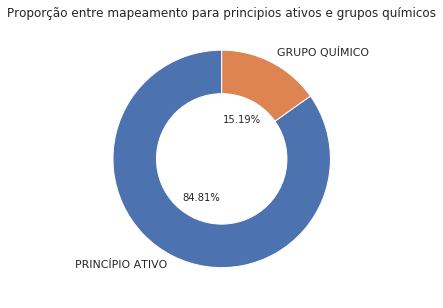

In [113]:
plt.figure(figsize=(5, 5))
#plt.title('Proporção entre mensagens de mídia e de texto')
n_pa = len(df_agro[df_agro['TIPO']=='princípio ativo'])
n_gq = len(df_agro[df_agro['TIPO']=='grupo químico'])
x = [n_pa, n_gq]
names = ['PRINCÍPIO ATIVO','GRUPO QUÍMICO']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.title('Proporção entre mapeamento para principios ativos e grupos químicos')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [115]:
a = df_agro[df_agro['P_ATIVO_MAP'] == 'NAO MAPEADO']['P_ATIVO_1'].unique()
a = list(a)
print(len(a))

1641


In [116]:
df_agro[['AGENTE_1','P_ATIVO_1','P_ATIVO_2', 'P_ATIVO_3','P_ATIVO_MAP','TIPO']]

,AGENTE_1,P_ATIVO_1,P_ATIVO_2,P_ATIVO_3,P_ATIVO_MAP,TIPO
3,ALDICARB,ALDICARB,nan,nan,ALDICARBE,princípio ativo
6,ALDICARB,ALDICARB,nan,nan,ALDICARBE,princípio ativo
7,IGNORADO,IGNORADO,nan,nan,NAO IDENTIFICADO,?
8,METAMIDOFOS,METAMIDOFOS,PIRACIOBINA,nan,METAMIDOFOS,princípio ativo
11,ORGANOFOSFORADO / CARBAMATO,ORGANOFOSFORADO / CARBAMATO,nan,nan,ORGANOFOSFORADO,grupo químico
12,ORGANOFOSFORADO / CARBAMATO,ORGANOFOSFORADO / CARBAMATO,nan,nan,ORGANOFOSFORADO,grupo químico
14,ORGANOFOSFORADO / CARBAMATO,ORGANOFOSFORADO / CARBAMATO,nan,nan,ORGANOFOSFORADO,grupo químico
16,PARAQUAT,PARAQUAT,nan,nan,PARAQUATE,princípio ativo
17,ALDICARD,ALDICARD,nan,nan,ALDICARBE,princípio ativo
23,OLEO VEGETAL,OLEO VEGETAL,nan,nan,OLEO VEGETAL,princípio ativo


In [117]:
#df_agro[(df_agro['P_ATIVO_1']=='nan') & (df_agro['P_ATIVO_2']!='nan')][['AGENTE_1','P_ATIVO_1', 
#                                                   'P_ATIVO_2', 'P_ATIVO_3','P_ATIVO_MAP','TIPO']]

In [128]:
len(df_agro[(df_agro['P_ATIVO_MAP']=='NAO MAPEADO')][['AGENTE_1','P_ATIVO_1', 
                                                    'P_ATIVO_2', 'P_ATIVO_3','P_ATIVO_MAP','TIPO']])

2831

In [132]:
df_agro[(df_agro['P_ATIVO_MAP']=='NAO MAPEADO')]['P_ATIVO_1'].nunique()

1641

### REGISTRO DAS VERSÕES DAS BASES PRÉ-PROCESSADAS

### v5
* Versão estável, com mapeamento de quase 85% da base. 
* Utiliza princípios ativos que foram excluídos, mostrados aqui: (http://portal.anvisa.gov.br/registros-e-autorizacoes/agrotoxicos/produtos/monografia-de-agrotoxicos/excluidas). Grande parte das intoxicações da base do MS eram dessas substâncias, que são proibidas atualmente no Brasil. 
* Diversos mapeamentos manuais de nome do produto para princípio ativo. Essa parte ainda dá para refinar mais, depende de ficar olhando na base o que não foi mapeado e incluir no meu mapeamento. 
* Utilizando também a coluna AGENTE_1 para fazer o mapeamento e escolhendo o mais específico entre AGENTE_1 e P_ATIVO_1.

### v6:
* Inclui AGENTE_1 na condição para remoção se nulo. Isso reduz bastante o corte, pois a maioria dos cortados contém somente AGENTE_1, porém aumenta bastante os não mapeados, uma vez que em AGENTE_1 contém quase sempre o nome do produto ou o nome popular. Uma forma de melhorar seria uma base com nome popular que ligasse a substância.

### v7:
* Processamento a posteriori da v6 para identificar os não mapeados com uma base de produtos->ingrediente ativo